In [1]:
# Library

import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Configurations 

class Model(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Linear(28,10)

  def forward(self,x):
    return self.layer1(x)

init_lr = 1
model = Model()
loss = torch.nn.MSELoss()

#1. LambdaLR

$$lr_{t} = lr_{0} * lambda(epoch)
$$

- 초기 learning rate에 lambda function을 곱한 값을 반환
- lambda 함수만 잘 설정해준다면, 이후의 모든 method를 구현할 수 있음

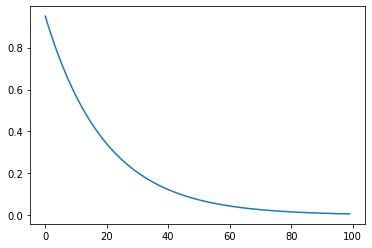

In [4]:
optimizer = torch.optim.Adam(model.parameters(), lr = init_lr)

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda epoch : 0.95**epoch)
# 매 에폭마다, learning rate를 0.95배로 감소시키겠다.

lrs = []

for i in range(100):
  input = torch.FloatTensor(28)
  pred = model(input)
  loss_ = loss(pred, torch.FloatTensor(10))

  optimizer.zero_grad()
  loss_.backward()
  optimizer.step()

  scheduler.step()
  lrs += scheduler.get_last_lr()
  
plt.plot(lrs)

# 2. MultiplicativeLR

$$lr_{t} = lr_{t-1} * lambda(epoch)
$$

- 이전 시점의 learning rate에 lambda function을 곱한 값을 반환

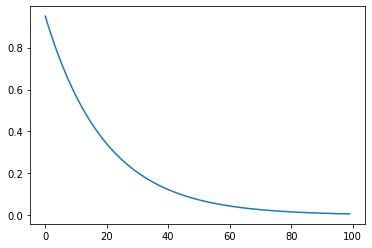

In [5]:
optimizer = torch.optim.Adam(model.parameters(), lr = init_lr)
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda = lambda epoch : 0.95)
# 매 에폭마다, learning rate를 0.95배로 감소시키겠다.

lrs = []

for i in range(100):
  input = torch.FloatTensor(28)
  pred = model(input)
  loss_ = loss(pred, torch.FloatTensor(10))

  optimizer.zero_grad()
  loss_.backward()
  optimizer.step()

  scheduler.step()
  lrs += scheduler.get_last_lr()
  
plt.plot(lrs)

# 3. StepLR

$$lr_{t} = lr_{t-step size} * Gamma
$$

- Step size마다 Gamma를 곱한 값을 반환.

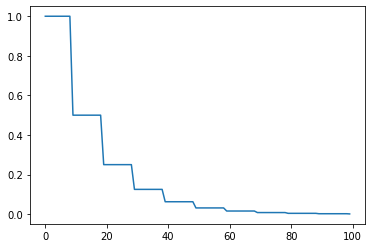

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr = init_lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.5)
# 매 10 에폭마다, learning rate를 절반으로 감소시키겠다.

lrs = []

for i in range(100):
  input = torch.FloatTensor(28)
  pred = model(input)
  loss_ = loss(pred, torch.FloatTensor(10))

  optimizer.zero_grad()
  loss_.backward()
  optimizer.step()

  scheduler.step()
  lrs += scheduler.get_last_lr()
  
plt.plot(lrs)

# 4. MultiStepLR

$$lr_{t} = lr_{t-1} * Gamma,\ if\ t\ in\ \{milestones\}
$$

- epoch이 milestone에 도달할 때마다, Gamma를 곱한 값을 반환

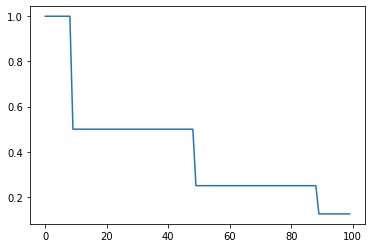

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr = init_lr)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones = [10,50,90], gamma = 0.5)
# 에폭이 10, 50, 90에 도달할 때마다 learning rate를 절반으로 감소

lrs = []

for i in range(100):
  input = torch.FloatTensor(28)
  pred = model(input)
  loss_ = loss(pred, torch.FloatTensor(10))

  optimizer.zero_grad()
  loss_.backward()
  optimizer.step()

  scheduler.step()
  lrs += scheduler.get_last_lr()
  
plt.plot(lrs)

# 5. ExponentialLR

$$lr_{t} = lr^{Gamma}_{t-1}
$$

- 매 epoch 마다 Gamma 제곱을 반환

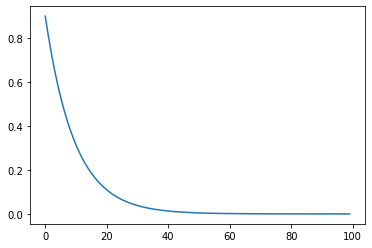

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr = init_lr)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.9)

lrs = []

for i in range(100):
  input = torch.FloatTensor(28)
  pred = model(input)
  loss_ = loss(pred, torch.FloatTensor(10))

  optimizer.zero_grad()
  loss_.backward()
  optimizer.step()

  scheduler.step()
  lrs += scheduler.get_last_lr()
  
plt.plot(lrs)

# 5. ReduceLROnPlateau

- 성능이 향상되지 않을 때, patience만큼 인내한 다음 learning rate를 감소시킴
- 성능을 평가할 지표를 넣어야 함

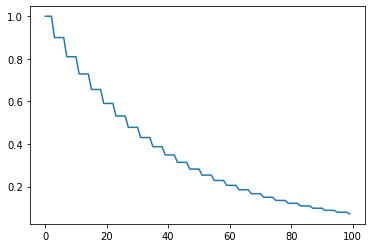

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr = 1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode = 'min', factor = 0.9, patience = 3, min_lr = 0.001)
# 매 validation마다 3번 참고, learning rate를 0.9배로 감소시키겠다.

lrs = []

for i in range(100):
  input = torch.FloatTensor(28)
  pred = model(input)
  loss_ = loss(pred, torch.FloatTensor(10))

  optimizer.zero_grad()
  loss_.backward()
  optimizer.step()

  # validation
  with torch.no_grad():

    input = torch.FloatTensor(28)
    pred = model(input)
    loss_ = loss(pred, torch.FloatTensor(10))

  scheduler.step(loss_)
  lrs.append(optimizer.param_groups[0]['lr'])

plt.plot(lrs)

# 5. CosineAnnealingLR


- 성능이 향상되지 않을 때, patience만큼 인내한 다음 learning rate를 감소시킴
- 성능을 평가할 지표를 넣어야 함

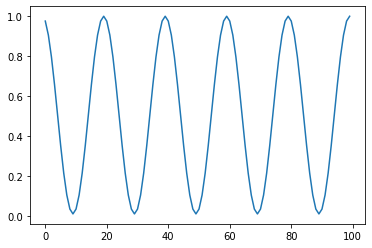

In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr = init_lr)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = 10, eta_min = 0.01)
# 20 epoch의 cycle과, [0.01, 1]의 범위를 가진 코사인 그래프의 모양을 그리며 학습한다.

lrs = []

for i in range(100):
  input = torch.FloatTensor(28)
  pred = model(input)
  loss_ = loss(pred, torch.FloatTensor(10))

  optimizer.zero_grad()
  loss_.backward()
  optimizer.step()

  scheduler.step()
  lrs += scheduler.get_last_lr()
  
plt.plot(lrs)